In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('CSE_445_Project_DB.csv')
df.head()


,Team names,PLAYER ID,PLAYER NAME,Key_Player,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,MVP
0,AFGANISTHAN,101,Mohammad Nabi*,NO,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,YES
1,AFGANISTHAN,102,FAREED AHMAD,NO,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,NO
2,AFGANISTHAN,103,NAJIBULLAH ZADRAN*,NO,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,NO
3,AFGANISTHAN,104,QAIS AHMAD,NO,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,NO
4,AFGANISTHAN,105,HAZRAT ZAZAI,YES,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,NO


In [4]:
df.dtypes

Team names           object
PLAYER ID             int64
PLAYER NAME          object
Key_Player           object
MATCHES               int64
TOTAL RUN             int64
BATTING AVG         float64
Strike Rate         float64
Wickets               int64
ECONOMY             float64
IMPACT (batting)    float64
wicket/match        float64
impact bowling      float64
Total impact        float64
Semi-probability    float64
MVP                  object
dtype: object

In [5]:
df.shape


(205, 16)

In [6]:
df.drop(['Team names', 'PLAYER NAME'], axis=1, inplace=True)


In [7]:
df.shape

(205, 14)

In [8]:
df.describe()

,PLAYER ID,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,207.151220,39.351220,555.717073,19.039659,112.941415,22.131707,5.895122,0.151366,0.60078,0.076000,0.227171,0.183756
std,64.938973,26.790647,738.183740,11.570433,37.371603,27.607849,3.908878,0.108072,0.57259,0.073562,0.091393,0.180666
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,152.000000,20.000000,34.000000,10.000000,100.000000,0.000000,0.000000,0.060000,0.00000,0.000000,0.170000,0.020000
50%,204.000000,34.000000,260.000000,20.350000,120.510000,10.000000,7.290000,0.150000,0.57000,0.070000,0.220000,0.100000
75%,259.000000,53.000000,792.000000,26.500000,136.200000,35.000000,8.200000,0.220000,1.10000,0.140000,0.280000,0.350000
max,326.000000,143.000000,3794.000000,57.380000,225.000000,125.000000,21.000000,0.490000,2.25000,0.270000,0.580000,0.500000


In [9]:
df.duplicated().sum()


0

In [10]:
df.isnull().sum()


PLAYER ID           0
Key_Player          0
MATCHES             0
TOTAL RUN           0
BATTING AVG         0
Strike Rate         0
Wickets             0
ECONOMY             0
IMPACT (batting)    0
wicket/match        0
impact bowling      0
Total impact        0
Semi-probability    0
MVP                 0
dtype: int64

In [11]:
df['Key_Player'].value_counts()


NO     162
YES     43
Name: Key_Player, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(df.Key_Player)
df['Target_key_player'] = label
df.head()


,PLAYER ID,Key_Player,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,MVP,Target_key_player
0,101,NO,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,YES,0
1,102,NO,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,NO,0
2,103,NO,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,NO,0
3,104,NO,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,NO,0
4,105,YES,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,NO,1


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder1 = LabelEncoder()
label1 = label_encoder1.fit_transform(df.MVP)
df['Target_MVP'] = label1
df.head()


,PLAYER ID,Key_Player,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,MVP,Target_key_player,Target_MVP
0,101,NO,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,YES,0,1
1,102,NO,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,NO,0,0
2,103,NO,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,NO,0,0
3,104,NO,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,NO,0,0
4,105,YES,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,NO,1,0


In [14]:
df1 = df.drop(['Key_Player', 'MVP',], axis=1)
df1.head()


,PLAYER ID,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,Target_key_player,Target_MVP
0,101,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,0,1
1,102,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,0,0
2,103,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,0,0
3,104,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,0,0
4,105,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,1,0


# Correcting the Imabalance In Dataset by SMOTE.

In [15]:
df1['Target_MVP'].value_counts()


0    164
1     41
Name: Target_MVP, dtype: int64

In [16]:
X = df1.drop(['Target_MVP'], axis=1)
y = df1['Target_MVP']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target_MVP (y) Shape Before Balancing :', y.shape)


Feature (X) Shape Before Balancing : (205, 13)
Target_MVP (y) Shape Before Balancing : (205,)


In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=300)


In [18]:
X, y = sm.fit_resample(X, y)


In [19]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target_MVP (y) Shape After Balancing :', y.shape)


Feature (X) Shape After Balancing : (328, 13)
Target_MVP (y) Shape After Balancing : (328,)


# Splitting the Data

In [20]:
x = df1.drop(columns=['Target_MVP', 'PLAYER ID'])
y = df1['Target_MVP']


In [21]:
x.max()


MATCHES               143.00
TOTAL RUN            3794.00
BATTING AVG            57.38
Strike Rate           225.00
Wickets               125.00
ECONOMY                21.00
IMPACT (batting)        0.49
wicket/match            2.25
impact bowling          0.27
Total impact            0.58
Semi-probability        0.50
Target_key_player       1.00
dtype: float64

In [22]:
x.min()


MATCHES              0.0
TOTAL RUN            0.0
BATTING AVG          0.0
Strike Rate          0.0
Wickets              0.0
ECONOMY              0.0
IMPACT (batting)     0.0
wicket/match         0.0
impact bowling       0.0
Total impact         0.0
Semi-probability     0.0
Target_key_player    0.0
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

# Scalling the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
scaler.scale_


array([9.61538462e-03, 4.45037828e-04, 1.74276751e-02, 6.81059729e-03,
       8.19672131e-03, 1.00000000e-01, 2.04081633e+00, 4.44444444e-01,
       3.70370370e+00, 2.32558140e+00, 2.00000000e+00, 1.00000000e+00])

As all data are in array form. We will use pandas dataframe to convert them into dataframe.


In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled.head()


,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,Target_key_player
0,0.146853,0.007116,0.000000,0.500000,0.240,0.414286,0.000000,0.715,0.615385,0.275862,0.04,0.0
1,0.006993,0.003163,0.227273,0.311111,0.008,0.452381,0.111111,0.500,0.384615,0.258621,0.50,0.0
2,0.314685,0.008434,0.121212,0.309156,0.408,0.346190,0.066667,0.565,0.576923,0.310345,0.04,0.0
3,0.160839,0.020295,0.242992,0.600356,0.208,0.438095,0.244444,0.565,0.461538,0.396552,1.00,0.0
4,0.237762,0.142066,0.509470,0.558222,0.016,0.337143,0.466667,0.030,0.038462,0.379310,0.60,0.0


# 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [31]:
y_pred_lr=reg.predict(x_test_scaled)

F1,Recall,Precision Score for Logistic Regression

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

print('Precision: ', precision_score(y_test, y_pred_lr))
print('Recall: ', recall_score(y_test, y_pred_lr))
print('f1_score: ', f1_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr, labels=(1, 0)))
print("Training Score: ", reg.score(x_train_scaled, y_train)*100)


Precision:  1.0
Recall:  0.5
f1_score:  0.6666666666666666
[[ 5  5]
 [ 0 31]]
Training Score:  93.90243902439023


Plotting Confusion Matrix

In [33]:
import seaborn as sns
sns.set(font_scale=1.5)


def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(
        confusion_matrix(y_true, y_preds, labels=(1, 0)),
        annot=True,
        cbar=False,
        fmt='g'
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')


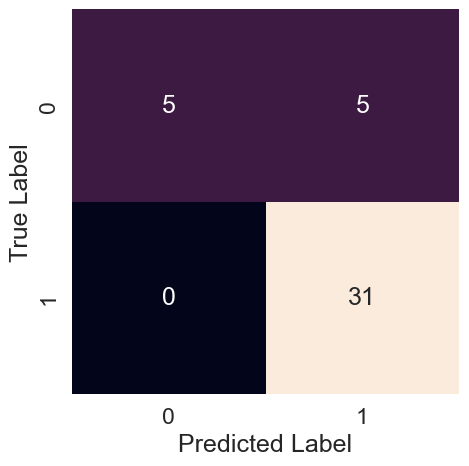

In [34]:
conf_matrix(y_test,y_pred_lr)

Accuracy of Logistic Regression

In [35]:
reg_acc = accuracy_score(y_test, y_pred_lr)*100
reg_acc


87.8048780487805

In [36]:
y_predtrain_lr = reg.predict(x_train_scaled)
reg_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
reg_train_acc


93.90243902439023

In [37]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'],'Train_Accuracy':[reg_train_acc],'Test_Accuracy':[reg_acc]})
print(tempResults)

results= pd.DataFrame()
print(type(results))

results = pd.concat( [results, tempResults] )

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results

             Algorithm  Train_Accuracy  Test_Accuracy
0  Logistic Regression       93.902439      87.804878
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,Logistic Regression,93.902439,87.804878
